[[ 1.         32.         40.         48.        ]
 [ 1.         22.30339202 32.42800173 41.92991025]]


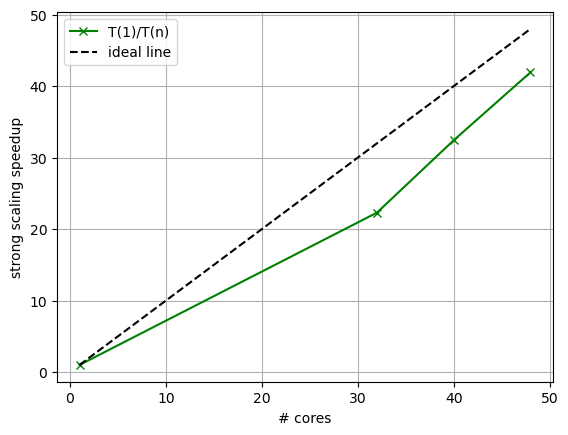

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def main():
    filenames = glob.glob("out/*.txt")
    data = np.zeros((len(filenames), 2))
    for i, filename in enumerate(filenames):
        data[i,:] = np.loadtxt(filename, dtype=float, delimiter=' ')


    data = data[data[:, 0].argsort()]

    data = data.T

    data[1,:] = data[1,0]/data[1,:] # normalize the runs by the single core execution

    print(data)

    ideal_line = np.array([[data[0,0], data[0,-1]],[data[0,0], data[0,-1]]])
    plt.plot(data[0,:], data[1,:], '-xg', label="T(1)/T(n)")
    plt.plot(ideal_line[0,:], ideal_line[1,:], '--k', label="ideal line")
    plt.xlabel("# cores")
    plt.ylabel("strong scaling speedup")
    plt.legend()
    plt.grid()
    plt.savefig("results.png")
    #plt.show()

if __name__ == "__main__":
    main()